
# Project: Investigate a Dataset - [TMDb movie Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10866 movies collected from The Movie Database (IMDb).
The table  has 21 columns which are :

  0) id                       identifier of the movie
 1) imdb_id              identifier of the movie on the website  object 
 2) popularity           A mmeasurment of movie popularity  float64
 3)   budget                Amount of money allocated for the movie  int64  
 4)   revenue               Profit from this movie  int64  
 5)   original_title        title of the movie  object 
 6)  cast                 info about the cast  object 
 7)   homepage              homepafe url  object 
 8)   director              info about the director  object 
 9)   tagline               slogan about the movie   object 
 10)  keywords              words that most describe the movie   object 
 11)  overview              short description about the move  object 
 12)  runtime               Number of mins or hours the movie was run  int64  
 13)  genres               Type of the movie in term of its theme object 
 14)  production_companies  infothe company that produce the movie   object 
 15)  release_date          When the movie was out  object 
 16)  vote_count            Number of voters for the movie  int64  
 17)  vote_average         Score average for the movie  float64
 18)  release_year         Year when movie was out  object  int64  
 19)  budget_adj            Amount of money allocated for the movie  in terms of 2010 dollars, accounting for inflation over time  int64    float64
 20)  revenue_adj           Profit from this movie   in terms of 2010 dollars, accounting for inflation over time int64 float64




### Question(s) for Analysis
1) Does the movie budget affect its revenue and popularity ?
2) What Theme (Genere) of movies get the most revenue?

In [1]:
# set up import packages 
import pandas as pd
import numpy as np
import matplotlib as plt

<a id='wrangling'></a>
## Data Wrangling
Clean data and make it ready for analysis
### General Properties


In [2]:
# Load your data and print out a few lines.
#   Perform operations to inspect data types and look for instances of missing


movies_data=pd.read_csv("Database_TMDb_movie_data//tmdb-movies.csv")



In [3]:
#size of your dataframe
movies_data.shape

(10866, 21)

In [4]:
#info about cols

movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#get some samples for investigation
movies_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
# check for missing data
#numbers reprsent number of missing values in each col

movies_data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning


## Handling Misisng Data

In [7]:
# Fill missing data in imdb_id with label : 9999
movies_data['imdb_id'].fillna('9999',inplace=True)

In [8]:
# Fill missing data in cast with label : "not available"
movies_data['cast'].fillna('not available',inplace=True)

In [9]:
#check percentage of missing data in homepage column
percentage_of_missing_data=movies_data['homepage'].isnull().sum()/len(movies_data)
print(percentage_of_missing_data)
#conclusion :  72% of homepage data is missing


0.7297993741947358


In [10]:
# Decision : Dropping the home page column
temp= movies_data.drop('homepage', axis=1)

In [11]:
movies_data=temp

In [12]:
# Fill misisng data in director with 'unknown"
movies_data['director'].fillna('unknown',inplace=True)

In [13]:
#check percentage of missing data in tagline column
percentage_of_missing_data=movies_data['tagline'].isnull().sum()/len(movies_data)
print(percentage_of_missing_data)
#conclusion :  26% of homepage data is missing

0.25989324498435484


In [14]:
# Decision : Fill tagline with "unavailable" string
movies_data['tagline'].fillna("unavailable",inplace=True)

In [15]:
#fill overview, genres, keywords, production_companies  with unavailable 
movies_data['overview'].fillna("unavailable",inplace=True)
movies_data['keywords'].fillna("unavailable",inplace=True)
movies_data['production_companies'].fillna("unavailable",inplace=True)



In [16]:
movies_data['genres'].fillna("unavailable",inplace=True)

In [17]:
#make sure that all missing data were handled
movies_data.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### All missing data were handled as mentined in each cell

In [18]:

#check if imdb_id col is the same as id
print(movies_data['imdb_id'])
movies_data['id']

0        tt0369610
1        tt1392190
2        tt2908446
3        tt2488496
4        tt2820852
           ...    
10861    tt0060371
10862    tt0060472
10863    tt0060161
10864    tt0061177
10865    tt0060666
Name: imdb_id, Length: 10866, dtype: object


0        135397
1         76341
2        262500
3        140607
4        168259
          ...  
10861        21
10862     20379
10863     39768
10864     21449
10865     22293
Name: id, Length: 10866, dtype: int64

#### imdb_id and id column are not the same col. I keep both

In [19]:
# check for duplicates
movies_data.duplicated().any()

True

In [20]:
# remove all duplocates
movies_data.drop_duplicates(inplace=True)

In [21]:
# confirmed that there is no duplicate
movies_data.duplicated().any()

False

In [22]:
#check columns data types
int_cols=movies_data.select_dtypes(include=['int64']).columns.tolist()
print(int_cols)

['id', 'budget', 'revenue', 'runtime', 'vote_count', 'release_year']


In [23]:
float_cols=movies_data.select_dtypes(include=['float64']).columns.tolist()
print(float_cols)

['popularity', 'vote_average', 'budget_adj', 'revenue_adj']


In [24]:
string_cols=movies_data.select_dtypes(include=['object']).columns.tolist()
print(string_cols)

['imdb_id', 'original_title', 'cast', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies', 'release_date']


#### After checking data types, I think the columns already have suitable data types. I just want to change release data to dateTime 

In [25]:
movies_data['release_date']= pd.to_datetime(movies_data['release_date'])

In [26]:
movies_data['release_date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 10865 entries, 0 to 10865
Series name: release_date
Non-Null Count  Dtype         
--------------  -----         
10865 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 169.8 KB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : Does the movie budget affect its revenue and popularity ?

#### Save the numeric variables on a sub dataframe to calculate correlation

In [27]:
import matplotlib.pyplot as plt
# Calculate correclation among variables using correlation matrix for non-object variables
#create new df with only numeric data
data_type_to_exclude = 'object'
numeric_movies_data=movies_data.select_dtypes(exclude=[data_type_to_exclude])
#ececulde id col 
numeric_movies_data.drop("id",axis=1,inplace=True)
numeric_movies_data


,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,95,2066-06-15,11,7.4,1966,0.000000e+00,0.000000e+00
10862,0.065543,0,0,176,2066-12-21,20,5.7,1966,0.000000e+00,0.000000e+00
10863,0.065141,0,0,94,2066-01-01,11,6.5,1966,0.000000e+00,0.000000e+00
10864,0.064317,0,0,80,2066-11-02,22,5.4,1966,0.000000e+00,0.000000e+00


In [28]:
# drop release_date
numeric_movies_data.drop(['release_year','release_date'],axis=1,inplace=True)

In [29]:
numeric_movies_data

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,5562,6.5,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,120,6185,7.1,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,119,2480,6.3,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,136,5292,7.5,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,137,2947,7.3,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,95,11,7.4,0.000000e+00,0.000000e+00
10862,0.065543,0,0,176,20,5.7,0.000000e+00,0.000000e+00
10863,0.065141,0,0,94,11,6.5,0.000000e+00,0.000000e+00
10864,0.064317,0,0,80,22,5.4,0.000000e+00,0.000000e+00


In [30]:
# Statistics about numeric data
print(numeric_movies_data.describe())


         popularity        budget       revenue       runtime    vote_count  \
count  10865.000000  1.086500e+04  1.086500e+04  10865.000000  10865.000000   
mean       0.646446  1.462429e+07  3.982690e+07    102.071790    217.399632   
std        1.000231  3.091428e+07  1.170083e+08     31.382701    575.644627   
min        0.000065  0.000000e+00  0.000000e+00      0.000000     10.000000   
25%        0.207575  0.000000e+00  0.000000e+00     90.000000     17.000000   
50%        0.383831  0.000000e+00  0.000000e+00     99.000000     38.000000   
75%        0.713857  1.500000e+07  2.400000e+07    111.000000    146.000000   
max       32.985763  4.250000e+08  2.781506e+09    900.000000   9767.000000   

       vote_average    budget_adj   revenue_adj  
count  10865.000000  1.086500e+04  1.086500e+04  
mean       5.975012  1.754989e+07  5.136900e+07  
std        0.935138  3.430753e+07  1.446383e+08  
min        1.500000  0.000000e+00  0.000000e+00  
25%        5.400000  0.000000e+00  0.0

In [31]:
#average revenue/ average budget
movies_data['revenue'].mean()/movies_data['budget'].mean()

2.7233395122090864

#### The previous description shows some statistics about numeric colums
#### There are some intresting findings like in vote_count the maximum number of votes is 9767 votes while the average is  217.
####  Checking the charactaristics of the movie that got this number of votes might be helpful in understanding the dataset
#### The average  budget is 14624290 dollars and the average revenue is  39826900 dollars, this mean that on average the 
#### reward is 2.7 * budget ( Investing in movies is very rewarding)

In [32]:
# Movie with the max number of votes
movies_data[movies_data['vote_count']>9000]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Christopher Nolan,Your mind is the scene of the crime.,loss of lover|dream|sleep|subconsciousness|heist,"Cobb, a skilled thief who commits corporate es...",148,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,2010-07-14,9767,7.9,2010,160000000.0,825500000.0


#### The movie with the max number of votes is categorized as Action, Thriller, Science Fiction, Mystery movie it has above average popularity, budget and revenue

In [33]:
# Calculate correlation matrix to explore relationship between variables
corr_matrix = numeric_movies_data.corr()
corr_matrix

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
popularity,1.000000,0.545481,0.663360,0.139032,0.800828,0.209517,0.513555,0.609085
budget,0.545481,1.000000,0.734928,0.191300,0.632719,0.081067,0.968963,0.622531
revenue,0.663360,0.734928,1.000000,0.162830,0.791174,0.172541,0.706446,0.919109
runtime,0.139032,0.191300,0.162830,1.000000,0.163273,0.156813,0.221127,0.175668
vote_count,0.800828,0.632719,0.791174,0.163273,1.000000,0.253818,0.587062,0.707941
vote_average,0.209517,0.081067,0.172541,0.156813,0.253818,1.000000,0.093079,0.193062
budget_adj,0.513555,0.968963,0.706446,0.221127,0.587062,0.093079,1.000000,0.646627
revenue_adj,0.609085,0.622531,0.919109,0.175668,0.707941,0.193062,0.646627,1.000000


In [34]:
# Check which numeric variables have strong positive linear relationship (Threshold=0.70)
threshold =0.70
filtered_corr = corr_matrix.where(~np.triu(np.ones(corr_matrix.shape)).astype(bool)) > threshold
print(filtered_corr)

              popularity  budget  revenue  runtime  vote_count  vote_average  \
popularity         False   False    False    False       False         False   
budget             False   False    False    False       False         False   
revenue            False    True    False    False       False         False   
runtime            False   False    False    False       False         False   
vote_count          True   False     True    False       False         False   
vote_average       False   False    False    False       False         False   
budget_adj         False    True     True    False       False         False   
revenue_adj        False   False     True    False        True         False   

              budget_adj  revenue_adj  
popularity         False        False  
budget             False        False  
revenue            False        False  
runtime            False        False  
vote_count         False        False  
vote_average       False        False  

### Based on correlation among variables, here are variables that have strong linear relationship ( correlation>=70%)
1) Revenue and budget
2) Vote count and popularity
3) Vote count and revenue
4) budget_adj and budget
5) budget_adj and revenue 
6) revenue_adj and vote count
7) revenue_adj and revenue

#### Draw relationship between Revenue and budget

Text(0.5, 0, 'Revenue')

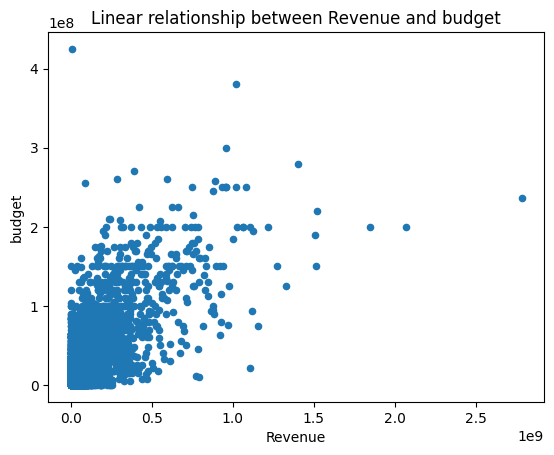

In [35]:
numeric_movies_data.plot.scatter(x='revenue', y='budget', title='Linear relationship between Revenue and budget').set_xlabel('Revenue')

#### Relationship between vote count and popularity

Text(0.5, 0, 'Vote Count')

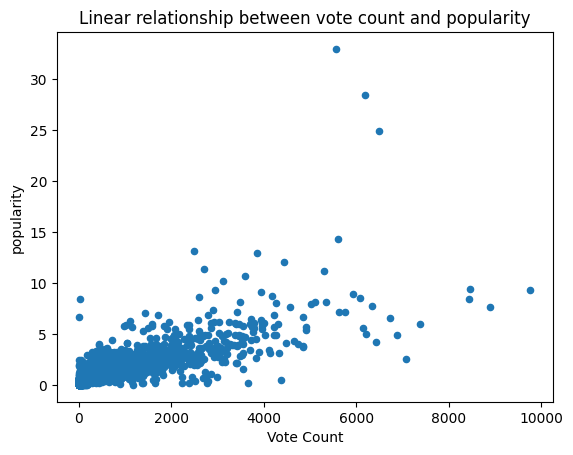

In [36]:
numeric_movies_data.plot.scatter(x='vote_count', y='popularity', title='Linear relationship between vote count and popularity').set_xlabel('Vote Count')

#### Relationship between budget count and popularity

Text(0.5, 0, 'Vote Count')

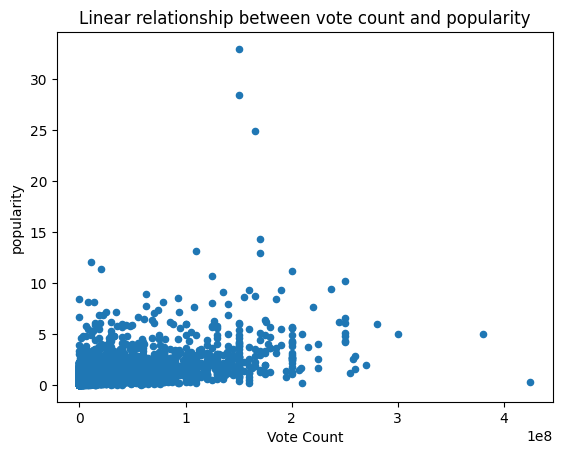

In [37]:
numeric_movies_data.plot.scatter(x='budget', y='popularity', title='Linear relationship between vote count and popularity').set_xlabel('Vote Count')

 #### Check wich year has the most number of movies

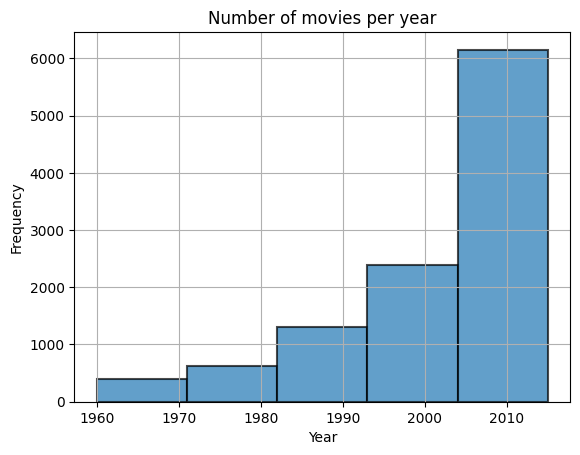

In [67]:
## histogram
movies_data['release_year'].hist( bins=5, edgecolor='black', alpha=0.7, linewidth=1.5)
# Add title and labels
plt.title('Number of movies per year')
plt.xlabel('Year')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [66]:
print(6000/len(movies_data))


0.5522319374137138


#### The histogram shows that most of the movies in the dataset ( 55%)  were  produced in 2010 and after


### Relationship between Revenue count and popularity

Text(0.5, 0, 'Vote Count')

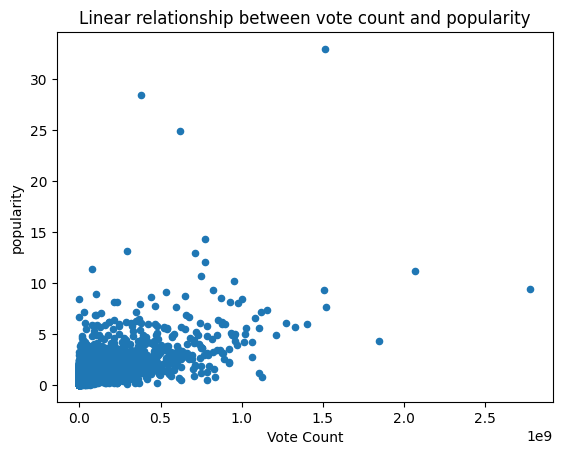

In [65]:
numeric_movies_data.plot.scatter(x='revenue', y='popularity', title='Linear relationship between vote count and popularity').set_xlabel('Vote Count')

### Research Question 2 :  What Theme (Genere) of movies get the most revenue?

#### Analysing the relationship betwee generes , revenue, budget and popularity

In [42]:
# Converting genere values to list of values
#relationship between genera and revenue 
#len(movies_data['genres'].unique())


### Save all unique movies genere into unique_generes list

In [43]:
list_of_genres=[]
unique_generes=set()
for movie in movies_data['genres']:
    list_of_generes=movie.split('|')
    for gen in list_of_generes:
        unique_generes.add(gen)
# store all movies themes in one set
unique_generes

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western',
 'unavailable'}

In [44]:
# we have 21 unique generes
len(unique_generes)

21

In [45]:
temp=movies_data

In [46]:
list_of_genere=[]
for genres in temp['genres']:
    list_of_genere.append(genres.split('|'))
    
    

In [47]:
temp=temp.assign(list_genere=list_of_genere)


In [48]:
# drom the genere to replace it with list of generes to handle it
temp.drop("genres",axis=1,inplace=True)

In [49]:
movies_data=temp

### The column genere now has list of themes for each movie

In [50]:
movies_data

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,list_genere
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,"[Action, Adventure, Science Fiction, Thriller]"
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,"[Action, Adventure, Science Fiction, Thriller]"
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,"[Adventure, Science Fiction, Thriller]"
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,"[Action, Adventure, Science Fiction, Fantasy]"
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,"[Action, Crime, Thriller]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,unavailable,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Bruce Brown Films,2066-06-15,11,7.4,1966,0.000000e+00,0.000000e+00,[Documentary]
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,0.000000e+00,0.000000e+00,"[Action, Adventure, Drama]"
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,unavailable,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mosfilm,2066-01-01,11,6.5,1966,0.000000e+00,0.000000e+00,"[Mystery, Comedy]"
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,0.000000e+00,0.000000e+00,"[Action, Comedy]"


#### Create new dataframe   to store data about budget, revenue and generes in order to study the relationship between 

#### revenue and budget with different generes
 

In [51]:
unique_generes

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western',
 'unavailable'}

In [52]:
#create list of dictionary to save each genere with its average popularity, average revenue , average budget
stat_about_themes=[]
for item in unique_generes:
    #print(movies_data['list_genere'][2])
    specific_item=item
    condition =movies_data['list_genere'].apply(lambda x: specific_item in x)
    filtered_movies=movies_data[condition]
    average_popularity=filtered_movies['popularity'].mean()
    average_revenue=filtered_movies['revenue'].mean()
    average_budget=filtered_movies['budget'].mean()
    stat_about_themes.append({"popularity":average_popularity, "revenue":average_revenue, "budget":average_budget,"genere":item})
    #print(average_popularity)
    #filtered_movies=movies_data[condition]
    # average_popularity=movies_data[condition]['popularity'].mean()
    #print(average_popularity)
    #average_budget = movies_data[condition]['budget'].mean()
    #average_revenue = movies_data[condition]['revenue'].mean()
    #stat_about_themes['theme']={'popularity':average_popularity,'budget':average_budget,'revenue':average_revenue}
print(len(stat_about_themes))
print((stat_about_themes))    

21
[{'popularity': 0.5926073422093329, 'revenue': 37526242.07223833, 'budget': 13297915.618244134, 'genere': 'Comedy'}, {'popularity': 0.786668393988627, 'revenue': 72433176.37367994, 'budget': 23359337.4207961, 'genere': 'Family'}, {'popularity': 0.4653566304215027, 'revenue': 16822808.624312766, 'budget': 6226529.210751374, 'genere': 'Horror'}, {'popularity': 0.6900121320987652, 'revenue': 40217566.6617284, 'budget': 16119270.062962962, 'genere': 'Mystery'}, {'popularity': 0.7415629927760577, 'revenue': 41728417.543859646, 'budget': 17207693.769177847, 'genere': 'Thriller'}, {'popularity': 0.48732118382352935, 'revenue': 28571768.69117647, 'budget': 9438627.549019609, 'genere': 'Music'}, {'popularity': 0.5920820490654205, 'revenue': 35691972.3271028, 'budget': 12531271.847546728, 'genere': 'Romance'}, {'popularity': 0.5906154787878787, 'revenue': 28568709.284848485, 'budget': 18974107.975757577, 'genere': 'Western'}, {'popularity': 0.7276831481481482, 'revenue': 47605183.3, 'budget':

In [53]:
# convert stat_about_themes list of dictionaries to genere stats dataframe
genere_stats= pd.DataFrame(stat_about_themes)

In [54]:
genere_stats

,popularity,revenue,budget,genere
0,0.592607,3.752624e+07,1.329792e+07,Comedy
1,0.786668,7.243318e+07,2.335934e+07,Family
2,0.465357,1.682281e+07,6.226529e+06,Horror
3,0.690012,4.021757e+07,1.611927e+07,Mystery
4,0.741563,4.172842e+07,1.720769e+07,Thriller
5,0.487321,2.857177e+07,9.438628e+06,Music
6,0.592082,3.569197e+07,1.253127e+07,Romance
7,0.590615,2.856871e+07,1.897411e+07,Western
8,0.727683,4.760518e+07,2.089189e+07,War
9,0.992840,9.631366e+07,3.261259e+07,Fantasy


#### The genere_stats dtaframe shows that  Action movies has :
1) Average budget of 2.772782e+07
2) Average revenue of 7.279473e+07 
3) Average popularity score of  0.926274 

#### Each genere has the same data

In [55]:
genere_stats.describe()

,popularity,revenue,budget
count,21.000000,2.100000e+01,2.100000e+01
mean,0.634532,4.210640e+07,1.592853e+07
std,0.277199,3.152533e+07,1.057148e+07
min,0.167966,0.000000e+00,2.173913e+02
25%,0.487321,2.856871e+07,9.438628e+06
50%,0.592607,3.752624e+07,1.720769e+07
75%,0.786668,7.014056e+07,2.315978e+07
max,1.154259,1.131379e+08,3.754369e+07


In [56]:
def print_max_genere(genere):
    print (genere_stats[genere_stats[genere]==genere_stats[genere].max()])
def print_min_genere( genere):
    print (genere_stats[genere_stats[genere]==genere_stats[genere].min()] )

In [57]:
# print the theme with the max popularity, budget, revenue
print_max_genere('popularity')
print()
print_max_genere('budget')
print()
print_max_genere('revenue')

    popularity       revenue        budget     genere
12    1.154259  1.131379e+08  3.754369e+07  Adventure

    popularity       revenue        budget     genere
12    1.154259  1.131379e+08  3.754369e+07  Adventure

    popularity       revenue        budget     genere
12    1.154259  1.131379e+08  3.754369e+07  Adventure


In [58]:
# print the theme with the min popularity, budget, revenue
# execlude unavailable genere from the dataframe
genere_stats=genere_stats[genere_stats['genere']!="unavailable"]
print_min_genere('popularity')
print_min_genere('budget')
print_min_genere('revenue')

    popularity       revenue         budget       genere
10    0.181432  2.041107e+06  577149.148077  Documentary
    popularity        revenue         budget    genere
19    0.270896  251497.005988  267664.670659  TV Movie
    popularity        revenue         budget    genere
19    0.270896  251497.005988  267664.670659  TV Movie


####  From the analysis above, adventure movies has the maximum popularity, revenue and budget

#### The Documentary movies has the worst popularity

#### The TV Movie has the least budget and the least revenue

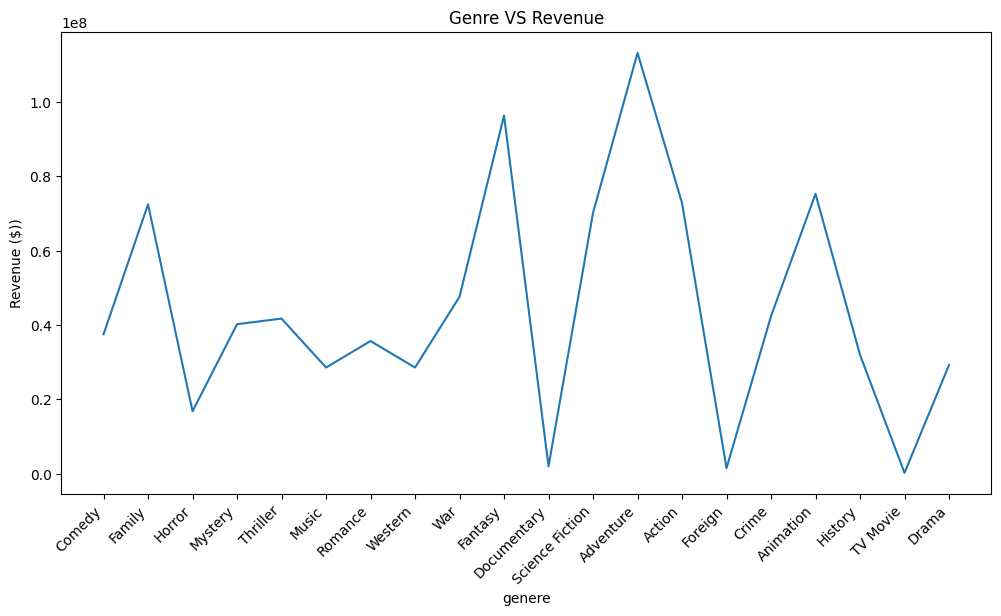

In [59]:
#temp=genere_stats.set_index('genere')
plt.figure(figsize=(12, 6))  # Adjust the figure size
plt.plot(genere_stats['genere'],genere_stats['revenue'])

# Adding labels and title
plt.xticks(rotation=45, ha='right')
plt.xlabel('genere')
plt.ylabel('Revenue ($))')
plt.title('Genre VS Revenue')

# Displaying the plot
plt.show()

#### The visulaization above confirm the previous finding and shows the following :
1) The adventure movies have the best revenue while TV movies has the worst revenue .
2) The science fiction, action and animation movies have very close revenue
3) Foreign movies have the second worst revenue
4) Fantasy movies have the second best revenue

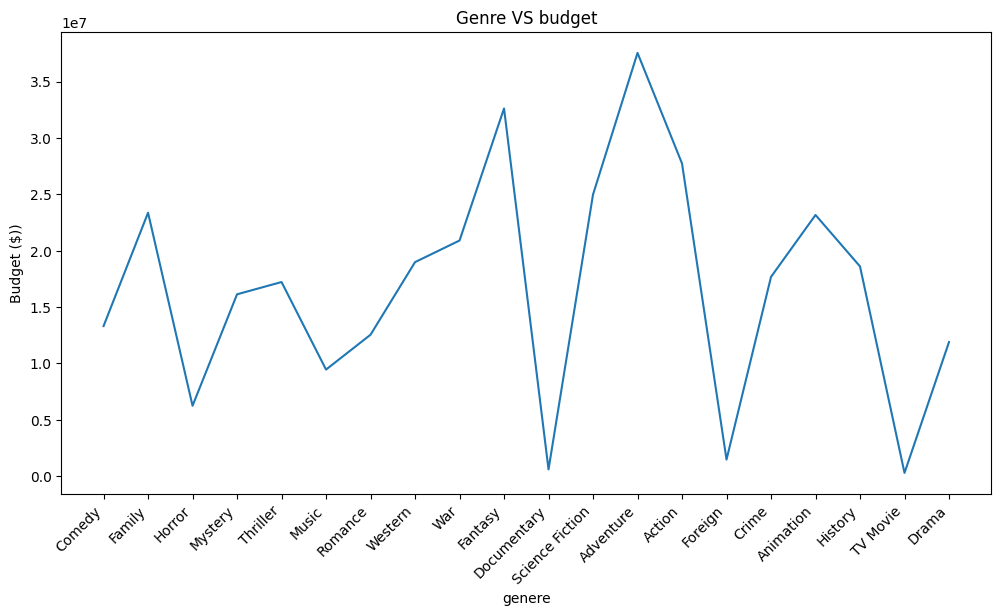

In [60]:

#temp=genere_stats.set_index('genere')
plt.figure(figsize=(12, 6))  # Adjust the figure size
plt.plot(genere_stats['genere'],genere_stats['budget'])

# Adding labels and title
plt.xticks(rotation=45, ha='right')
plt.xlabel('genere')
plt.ylabel('Budget ($))')
plt.title('Genre VS budget')

# Displaying the plot
plt.show()

#### The visulaization above confirm the previous findings and shows the following :
1) that the adventure movies have the biggest budget while TV movies has the least budget .
2) The science fiction, action and animation movies have very close budget too
3) Foreign movies have the second least budget
4) Fantasy movies have the second biggest budget

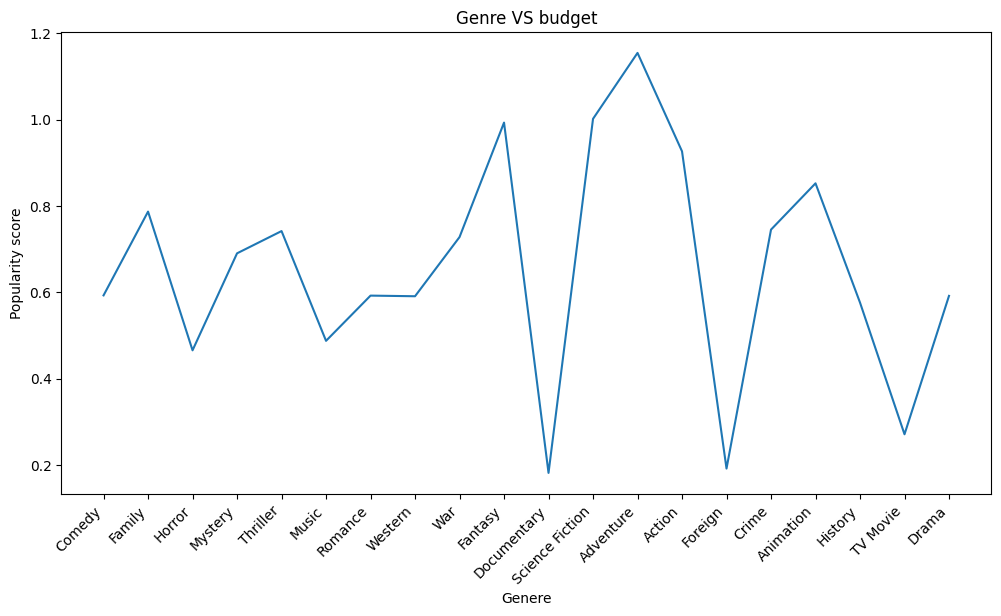

In [61]:

#temp=genere_stats.set_index('genere')
plt.figure(figsize=(12, 6))  # Adjust the figure size
plt.plot(genere_stats['genere'],genere_stats['popularity'])

# Adding labels and title
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genere')
plt.ylabel('Popularity score')
plt.title('Genre VS budget')

# Displaying the plot
plt.show()

#### The visulaization above confirm the previous findings and shows the following :
1) The adventure movies are the most popular
2) The science fiction, action and fantasy movies are ranking the second in term of popularity
3) Documentaries and Foreign movies are the least popular 


<a id='conclusions'></a>
## Conclusions


### Question 1 :  Does the movie budget affect its revenue and popularity ?

#### The Analysis shows that there is a strong positive  linear relationship between budget and revenue and  a moderate   linear relationship  between budget and popularity.

1) The Pearson correlation coefficient  was 0.73 between budget and revenue. This means that when the budget increases, the  revenue tends to also increase in a linear fashion. The analysis also shows that on average the revenue is 2.7 more than the  budget (Revenue= 2.7 * budget). 

2) The peason correlation coofecient between budget and popularity is 0.54  this means that as one variable increases, the other variable tends to also increase, but the relationship is not as strong as it would be with a higher correlation coefficient.
    
### Question 2:  What Theme (Genere) of movies get the most revenue?

#### Regrading the revenue, the previous analysis shows the following :
1) The adventure movies have the best revenue while TV movies has the worst revenue.
2) Fantasy movies have the second best revenue
3) The science fiction, action and animation movies have very close revenue.
4) Foreign movies have the second worst revenue

#### Regarding the budget, the previous analysis shows the following :
1) the adventure movies have the biggest budget while TV movies has the least budget .
2) Fantasy movies have the second biggest budget
3) The science fiction, action and animation movies have very close budget too
4) Foreign movies have the second least budget

#### The analysis before shows similarity between the relationship between the movie theme and budget and the movie theme and

#### revenue this might be due to the strong positive  linear relationship between themx

###  Limitation  :
1) Not enough statistical tests were implemented
2) Vote average  and vote count were not analysed enough. I believe that there are interesting findinngs between vote average , popularity, budget and revenue as vote average usually shows how good the movie is.
3) Budget_adj and revenue_Adj columns were ignored as if they are not exist.
4) Genere analysis may not be accurate because each movie is categorised to multiple generes but genres were analysed separatey.
5) I did not answer many questions like are adventure movies most popular and have most  revenue because people love adventure movies or because on average the budget invested in advanture movies are the biggest. Do more analysis on  vote average and more statistcal analysis might answer these questions
6) it is better if the research question 2  was What is the best theme (Genere) of movies to invest in instead of What Theme (Genere) of movies get the most revenue?

### Insigths :

1) Investing a budget in  movies might be very rewading
2) I thought I would be able to answer what the best movie theme to invest in is, but unfortunately, I haven't.


In [62]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 872044 bytes to Investigate_a_Dataset.html
